In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


In [6]:
# Why did I create this? 
# I created this script due to boredam and lack of motivation to study for my stats final. The
# parameters are completely based on heuristcs and prior semester grading distributions in the 
# Tepper PTOH program.

# inputs
numValues = 70 # size of the samples in the distribution
maxValue = 80 # seems to be where the highest point of the curve is centered - mean?
runs = 10000 # simulation runs
skewness = 500 # Negative values are left skewed, positive values are right skewed.
uncle_max = []
mu = 75 # average for all non-final grades as a %
sigma = 15 # sd for all non-final grades as a %
non_final_weight = .55 # weighting for all non-final related work
final_weight = .45 # weighting for the final exam
cutoff = .005 # quantile cutoff


In [7]:
# simulated runs of the distribution of the class distribution
for i in range(runs):      
    random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues)  #Skewnorm function
    class_non_final = np.random.normal(mu, sigma, numValues)
    class_final_grade = final_weight * random + non_final_weight * class_non_final
    uncle_max.append(class_final_grade)






[[77.46480584 80.06166118 80.72900013 ... 75.6553862  82.35518327
  70.81810817]
 [78.14403368 81.58764545 80.11747088 ... 82.98152108 74.09010003
  75.45569754]
 [72.78290305 92.89302269 74.04058513 ... 86.57935137 82.06024375
  83.60480073]
 ...
 [84.48345087 81.63898985 72.63842154 ... 75.26755369 76.57225297
  86.51081424]
 [56.77885026 72.56451096 88.55950766 ... 77.96233392 88.40531768
  92.33100009]
 [67.07025897 74.25235205 76.46806215 ... 71.22152137 88.43420262
  75.89329857]]
Enter your estimated non-final grade as a %: 70
Enter your estimated final grade as a %: 75
You Pass!!!!


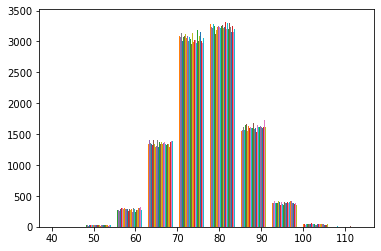

In [8]:
uncle_max_array = np.asarray(uncle_max)
uncle_max_array_2 = np.concatenate(uncle_max)    

# delete values over 100
indexArr = np.argwhere(uncle_max_array > 100)
uncle_max_array_2 = np.delete(uncle_max_array, indexArr)
print(uncle_max_array)

# failure cutoff at .5% quantile 
quantile = np.quantile(uncle_max_array_2, cutoff)

# user inputs scores below
while True:
    try:
        user_non_final = int(input("Enter your estimated non-final grade as a %: "))
        if user_non_final < 0 or user_non_final > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 0-100.")

while True:
    try:
        user_final = int(input("Enter your estimated final grade as a %: "))
        if user_final < 0 or user_final > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 0-100.")
        
# compare user scores to the quantile                
if final_weight * user_final + non_final_weight * user_non_final > quantile:
    print("You Pass!!!!")
else:
    print("You Fail! HAHAHAHAHAHA")   
          
# user_final = int(input("Enter your estimated final grade:"))



plt.hist(uncle_max_array)
plt.show()